In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
class SportsAnalysis:
    def __init__(self, data):
        self.data = data
        self.player_stars = []

    
    def calculate_career_stats(self, player_name):
        try:
              # Checking if empty player_name
          if player_name is None or player_name == '':
            print("Error: Player name cannot be null or empty")
            return None
          # Checking for non-string player_name
          if not isinstance(player_name,str):
            raise TypeError("Player name must be string")
          # Checking for the space 
          if not player_name.strip():
            raise ValueError("Player name cannot be empty or contain only spaces")
          # Checking if player is in data
          if player_name not in self.data['name'].values:
            print("Error: Player not found in data")
            return None
        except (TypeError, ValueError) as e:
            return str(e)
        else:
            player_df = self.data[self.data['name'] == player_name]
            years_active = player_df['year_end'].max() - player_df['year_start'].min() + 1
            height_inches = player_df['height'].iloc[0]
            try:
              inches = int(height_inches.split("-")[0]) * 12 + int(height_inches.split("-")[1])
            except ValueError:
              print("This value cannot be converted into integer")
            height_feet = int(inches // 12)
            height_inches = int(inches % 12)
            weight = player_df['weight'].mean()
            return {'years_active': years_active, 'height_feet': height_feet,
                    'height_inches': height_inches, 'weight': weight}
        
    def calculate_player_stats(self, player_name):
        try:
             # Checking if empty player_name
          if player_name is None or player_name == '':
            print("Error: Player name cannot be null or empty")
            return None
          # Checking for non-string player_name
          if not isinstance(player_name,str):
            raise TypeError("Player name must be string")
          # Checking for the space 
          if not player_name.strip():
            raise ValueError("Player name cannot be empty or contain only spaces")
          # Checking if player is in data
          if player_name not in self.data['name'].values:
            print("Error: Player not found in data")
            return None
        except (TypeError, ValueError) as e:
            return str(e)
        else:
            player_df = self.data[self.data['name'] == player_name]
            points = player_df['PTS'].sum()
            rebounds = player_df['TRB'].sum()
            assists = player_df['AST'].sum()
            return {'points': points, 'rebounds': rebounds, 'assists': assists}
    
    def visualize_player_performance(self,player_name):
        try:
          # Checking if empty player_name
          if player_name is None or player_name == '':
            print("Error: Player name cannot be null or empty")
            return None
          # Checking for non-string player_name
          if not isinstance(player_name,str):
            raise TypeError("Player name must be string")
          # Checking for the space 
          if not player_name.strip():
            raise ValueError("Player name cannot be empty or contain only spaces")
          # Checking if player is in data
          if player_name not in self.data['name'].values:
            print("Error: Player not found in data")
            return None
        except (TypeError, ValueError) as e:
            return str(e)
        else:
            points = self.data[self.data['name'] == player_name][['PTS', 'AST', 'TRB']].sum()
            plt.bar(['PTS', 'AST', 'TRB'], [points.loc['PTS'], points.loc['AST'], points.loc['TRB']])
            plt.title(player_name + ' Performance')
            plt.xlabel('Stat Category')
            plt.ylabel('Total')
            plt.show()
    #Function to calculate performance of all the players
    def calculate_performance(self,data):
          self.player_stars = data[['name','AST','TRB','PTS']]
          self.player_stars['Performance'] = (self.player_stars['AST']*0.2) + (self.player_stars['TRB']* 0.3) + (self.player_stars['PTS']*0.5) 
          return (self.player_stars)
    #Printing the top-10 players out of the list    
    def top_players(self, data, n = 10):
          self.player_stars = self.calculate_performance(data)
          top_n_players = self.player_stars.sort_values(by='Performance',ascending = False).head(n)
          return top_n_players
    #Plotting Top-10 players
    def plot_player_graph(self, data_to_plot):
          data_to_plot.set_index('name').plot(kind = 'bar')
          plt.title("Visualizing the performance of top 10 players")
    #Comparing top-10 players to one random player
    def compare_players(self,top_n_players,player_to_compare):
        #plt.title("Comparing and visualizing the performance of top 10 players")
        top_n_players.loc[10] = self.player_stars.iloc[player_to_compare]
        top_n_players.set_index('name').plot(kind = 'bar')

    #Comparing one of the top-10 player to other random player
    def compare_players_single(self, first_player,player_to_compare):
      temp_df = pd.DataFrame(columns=self.player_stars.columns)
      temp_df.loc[0] = self.player_stars.iloc[first_player]
      temp_df.loc[1] = self.player_stars.iloc[player_to_compare]
      temp_df.set_index('name').plot(kind = 'bar')

In [47]:
import warnings
warnings.filterwarnings('ignore')
#Importing player data
data = pd.read_csv('/content/player_data.csv')
ps = SportsAnalysis(data)

In [48]:
# Calculating career stats for a player
player_name = random.choice(data['name'])
print("Calculating career stats for player:", player_name)
print(ps.calculate_career_stats(player_name))
print(ps.calculate_player_stats(player_name))

Calculating career stats for player: Michael Bradley
{'years_active': 5, 'height_feet': 6, 'height_inches': 10, 'weight': 245.0}
{'points': 139, 'rebounds': 203, 'assists': 32}



Visualizing the points, assists and rebounds of a player: Michael Bradley


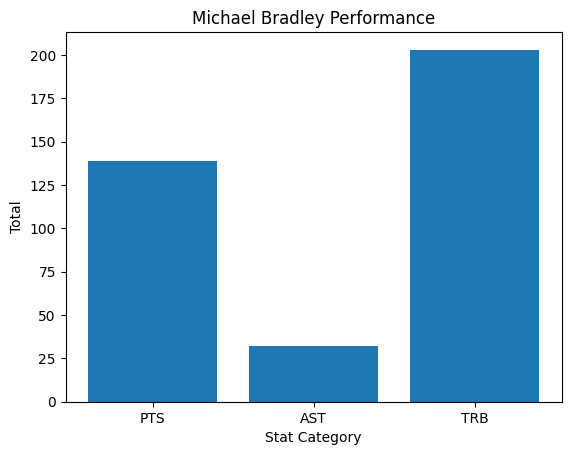

In [49]:
#This graph visualizes the data of a player
print("\nVisualizing the points, assists and rebounds of a player:", player_name)
ps.visualize_player_performance(player_name)

In [50]:
#Calculating the player performance of the given data
print("Calculating performance of all the player:\n")
print(ps.calculate_performance(data))

Calculating performance of all the player:

                     name  AST  TRB  PTS  Performance
0          Alaa Abdelnaby  176  640  458        456.2
1         Zaid Abdul-Aziz  109   89  279        188.0
2     Kareem Abdul-Jabbar  140  100  438        277.0
3      Mahmoud Abdul-Rauf   20  296   63        124.3
4       Tariq Abdul-Wahad   20   84   59         58.7
...                   ...  ...  ...  ...          ...
4545           Ante Zizic   96    7  492        267.3
4546             Jim Zoet   57   72  289        177.5
4547            Bill Zopf    0    9   11          8.2
4548          Ivica Zubac   57   63  278        169.3
4549           Matt Zunic   75  204  268        210.2

[4550 rows x 5 columns]


In [51]:
#Printing the top 10 players from the dataset
print("\nTop 10 players based on performance:\n")
top_10_players = ps.top_players(data)
print(top_10_players)


Top 10 players based on performance:

                   name  AST   TRB   PTS  Performance
1814    Tyler Honeycutt  275   869  3586       2108.7
1694        Chuck Hayes  192   138  4029       2094.3
1948       Damion James  403   509  2948       1707.3
4091       Myles Turner  492  1246  2450       1697.2
1582         Bruce Hale  148   288  3033       1632.5
3565       Frank Schade  910    54  2719       1557.7
3294     Frank Radovich  370   208  2822       1547.4
2223          Greg Kite  414   458  2649       1544.7
4230  Donald Washington  179   261  2831       1529.6
1799       John Holland  386   293  2719       1524.6



Visualizing the top 10 players:



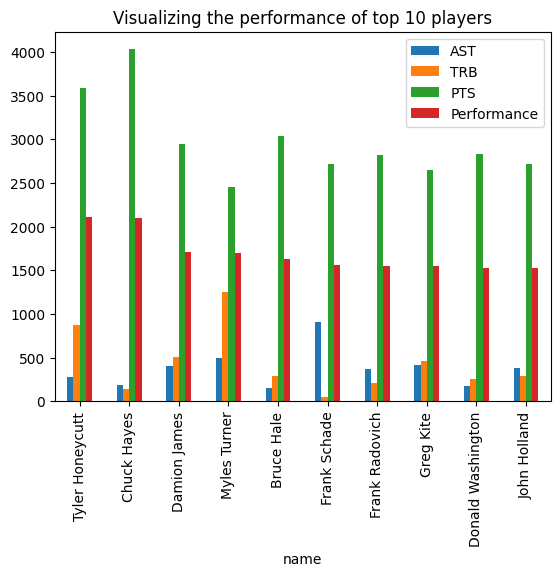

In [52]:
#Visualizing the top-10 players from the dataset
print("\nVisualizing the top 10 players:\n")
ps.plot_player_graph(top_10_players)

Comparing top-10 players to one random player:



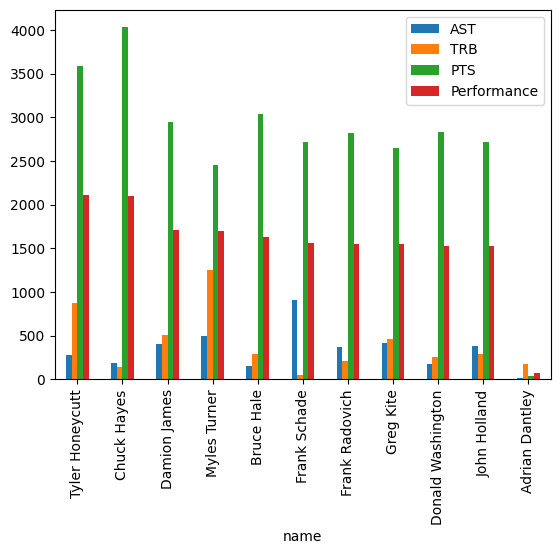

In [53]:
#Visualizing and comparing the top-10 players with a random player in dataset
print("Comparing top-10 players to one random player:\n")
ps.compare_players(top_10_players,np.random.randint(1, 4540))

Comparing single player in top-10 players to one random player:



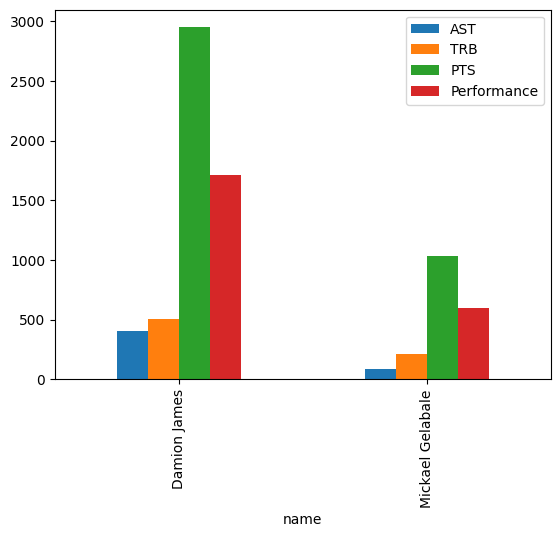

In [54]:
#Visualizing and comparing one random player from top-10 players list with a random player
print("Comparing single player in top-10 players to one random player:\n")
ps.compare_players_single(random.choice(list(top_10_players.index)) ,np.random.randint(1, 4540))